# Assignment 1

**Name:** Heriberto Zapata Solano

**e-mail:** heriberto.zapata7939@alumnos.udg.mx

# Modules
Here are all the libraries used during this activity


In [17]:
import numpy as np
from scipy.stats import cauchy, levy_stable
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


# Activity 1: Correlated Random Walk - 1 Trajectory
- Select rotations from a Cauchy distribution (scipy).
- Implement usign Vec2d class.
- Keep trajectory in a numpy array
- Visualize trajectory using plotly - 2D projection

We define the 2D vector class

In [18]:
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)

    def __mul__(self, scalar):
        return Vec2d(self.x * scalar, self.y * scalar)

    def __repr__(self):
        return f"Vec2d({self.x}, {self.y})"

The Cauchy distribution, named after Augustin Cauchy, is a continuous probability distribution. It is also known, especially among physicists, as the Lorentz distribution (after Hendrik Lorentz), Cauchy–Lorentz distribution, Lorentz(ian) function, or Breit–Wigner distribution.
The Cauchy distribution $f(x;x_0, y)$ s the distribution of the x-intercept of a ray issuing from $(x_0, y)$ with a uniformly distributed angle. It is also the distribution of the ratio of two independent normally distributed random variables with mean zero.

In [19]:
steps = 100
rotations = cauchy.rvs(loc=0, scale=0.7, size=steps)

traj = np.zeros((steps, 2))
traj[0] = [0, 0]

## How can we describe this mathematically?

The simplest random walk to understand is a 1-dimensional walk. Suppose that the black dot below is sitting on a number line. The black dot starts in the center.

Then, it takes a step, either forward or backward, with equal probability. It keeps taking steps either forward or backward each time. Let's call the 1st step a1, the second step a2, the third step a3 and so on. Each "a" is either equal to +1 (if the step is forward) or -1 (if the step is backward). Now we aare gonna do it in a 2- dimensional walk, implementing the correlated random walk using the Vec2d class


In [20]:
for i in range(1, steps):
    rotation = rotations[i-1]
    pre_pos = Vec2d(*traj[i-1])
    nw_pos = pre_pos + Vec2d(np.cos(rotation), np.sin(rotation))
    traj[i] = [nw_pos.x, nw_pos.y]

**Visualizing using Plotly**

In [21]:
fig = px.line(x=traj[:, 0], y=traj[:, 1])
fig.update_layout(title="Random Walk", xaxis_title="X", yaxis_title="Y")
fig.show()

## References
*  Random walks. (n.d.). https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm
*  Wikipedia contributors. (2024, August 3). Cauchy distribution. Wikipedia. https://en.wikipedia.org/wiki/Cauchy_distribution

# Activity 2: Lévy distribution - N different curves
- Plot at least the 4 different curves shown in the figure using plotly.
- Each one of the curves corresponds to a different alpha value.
- Consider the following parameters: m = 3.0, beta = 0.

## What is the levy function

 The stable distribution also referred to as **the Lévy alpha-stable distribution** in [Paul Lévy](https://es.wikipedia.org/wiki/Paul_Pierre_L%C3%A9vy), so what is the characteristic function?

**Function  φ(t, α, β, c, μ):**

$$ \phi(t, \alpha, \beta, c, \mu) = e^{i t \mu - |c t|^\alpha \left(1 - i \beta \, \text{sgn}(t) \Phi(\alpha, t)\right)} $$

Where:
$$
\Phi(\alpha, t) =
\begin{cases}
\tan\left(\frac{\pi}{2 \alpha}\right) & \text{si } \alpha \neq 1 \\
-\frac{2 \pi}{\ln |t|} & \text{si } \alpha = 1
\end{cases} $$
**Fourier Transform f(x):**

$$ f(x) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \phi(t) e^{-i x t} \, dt $$


In [22]:
# Common parameters
m = 3.0  # Location
beta = 0.0
c = 1.0  # in ecuation is c

# Values of alpha
curves = [0.5, 0.9, 1.1, 1.9]

1. **α (Stability Parameter `curves`):**
   - Determines the curves behavior of the distribution.
   - When *$\alpha > 2$ the curves they can be very low or undetectable*

2. **β (Skewness Parameter `beta`):**
   - Controls the asymmetry of the distribution.
   - When $\beta = 0$, *the distribution is symmetric.*
  
3. **c (Scale Parameter `c` ):**
   - Adjusts the dispersion of the distribution.

4. **μ (Location Parameterm `m` ):**
   - Shifts the distribution along the x-axis.

Then here are go plot the results:

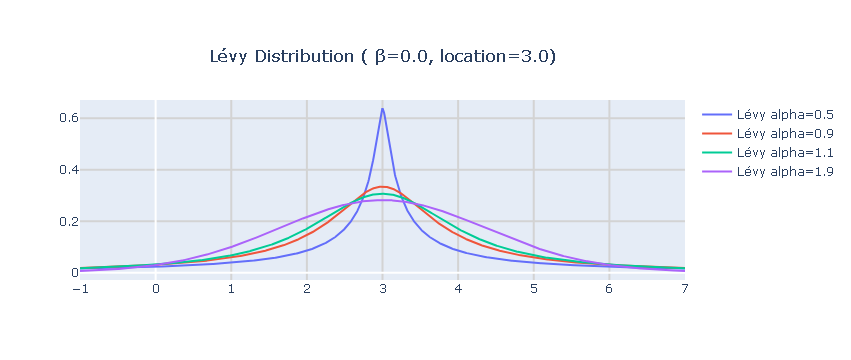

In [23]:

# values of x
x = np.linspace(-1, 7, 1000)

# list empty for Plotly
curves_plot = []

# Generate and plot value of alpha
for alpha in curves:
    y = levy_stable.pdf(x, alpha, beta, loc=m, scale=c)
    name_value = go.Scatter(x=x, y=y, mode='lines', name=f'Lévy alpha={alpha}')
    curves_plot.append(name_value)

# Layout de la gráfica
layout = go.Layout(
     title=dict(
        text='Lévy Distribution ( β={}, location={})'.format(beta, m),
        x=0.45,  # Positioning the title in the center
        xanchor='center',  # Ensures the title is centered at x=0.5
        yanchor='top'  # Keeps the title anchored to the top
    )
    , xaxis=dict(gridcolor='lightgray', gridwidth=2)
    , yaxis=dict(gridcolor='lightgray', gridwidth=2)
    , showlegend=True

)

# Crear y mostrar la figura
levy_plot = go.Figure(data=curves_plot, layout=layout)
levy_plot.show()

## Note:

 We use the `scipy.stats import levy_stable` because the `levy_stable.pdf` function is part of the scipy.stats library, which is part of the Python scientific library scipy.

The [levy_stable.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html#scipy-stats-levy-stable) function is used to calculate the probability density function (PDF) of the Lévy distribution, which is a continuous probability distribution used to model phenomena that exhibit heavy-tailed behaviors.

## References
- Library used: `scipy.stats.levy_stable`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html#scipy-stats-levy-stable

- Teory:
https://en.wikipedia.org/wiki/Stable_distribution

# Activity 3:Lévy distribution - Histograma + Curve
- From a set of random values drawn from a Lévy stable distribution, obtain its histogram
and compare it to the corresponding PDF curve.
- Visualize using matplotlib.

Define the parameters of the Lévy stable distribution: `alpha` = 1.9 and  `beta` = 0.

In [24]:
# parameters
alpha, beta = 1.9, 0


## Why is PDF curve?

- Probability density function, PDF (x, alpha, beta, loc=0, scale=1)

Is a way of describing the distribution of a random variable. In this case of the stable Lévy distribution, the PDF is a function that describes the probability that a random variable takes on a specific value.

In [25]:

# Range of x values
x = np.linspace(-10, 10)  # Manually setting the range


The `levy_stable.rvs` and the extension `rvs` (Random Variates) function returns a set of random values ​​generated from the stable Lévy distribution with parameters `alpha` and `beta`.

In [28]:
# Generate random values from the Lévy stable distribution
rand_v = levy_stable.rvs(alpha, beta, size=1000)


Then plot the results

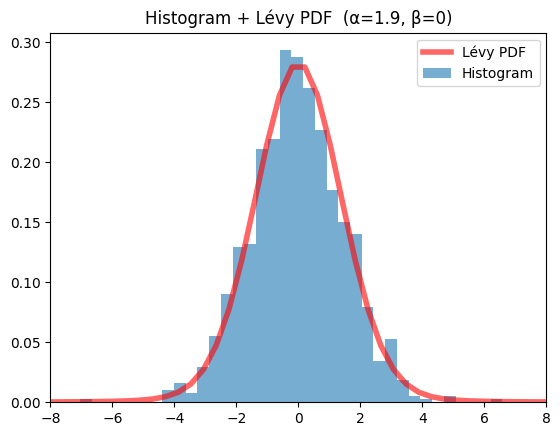

In [29]:
# Plot the PDF of the Lévy stable distribution
plt.plot(x, levy_stable.pdf(x, alpha, beta), 'r-', lw=4, alpha=0.6, label='Lévy PDF')

# Plot the histogram of the random values
plt.hist(rand_v, density=True, bins='auto', histtype='stepfilled', alpha=0.6, label='Histogram')

# Set the limits of the plot to match the x range
plt.xlim([-8, 8])

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.title(f'Histogram + Lévy PDF  (α={alpha}, β={beta})')
plt.show()


In conclusion, a graph was made comparing the probability density function (PDF) of a stable Lévy distribution with a histogram of random values ​​generated from the same distribution.

## References
- Library used: `scipy.stats.levy_stable`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html#scipy-stats-levy-stable

- Github of reference:
https://github.com/cpgr/levy/blob/master/LevyTesting.ipynb?short_path=7d27fc1

# Activity 4: Lévy flight - Vec2d - 1 Trajecotry
- Generate a Lévy flight trajectory.
- Implement usign Vec2d class.
- Keep the trajectory in a pandas Data Frame.
- Visualize trajectory using plotly - 3D projection

What is "vec2d" used for in this code?

The Vec2d class is only used to represent 2D vectors (for the x and y coordinates), but the trajectory is plotted in a 3D space.

In [32]:
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vec2d(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vec2d(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):
        return Vec2d(self.x / scalar, self.y / scalar)

    def magnitude(self):
        return np.sqrt(self.x**2 + self.y**2)

    def normalize(self):
        mag = self.magnitude()
        return self / mag if mag != 0 else Vec2d(0, 0)


What is the parameters we use

In [33]:
# Lévy flight parameters
np.random.seed(0)
steps = 1000
alpha =1.5
scale = 1.0
trajectory = [Vec2d(0, 0)]  # Starts at the origin

## What is the possible solution:
- **Searching an area with smaller steps:** The algorithm explores a small area in great detail, taking small steps.

- **Moving to another area using long steps:** After exploring the initial area, the search algorithm moves to another area.  *The line represents this.*

- **Searching an area with smaller steps:** Once in the new location, the algorithm explores it again with smaller steps, repeating the detailed exploration process.

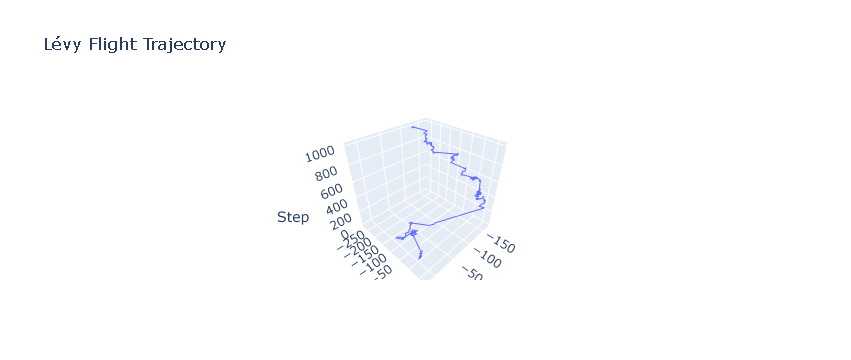

In [34]:

# Lévy flight simulation
for _ in range(steps):
    direction = np.random.uniform(0, 2 * np.pi)  # Random direction
    step_length = np.random.pareto(alpha) * scale  # Step length
    step = Vec2d(np.cos(direction) * step_length, np.sin(direction) * step_length)
    trajectory.append(trajectory[-1] + step)  # Add the step to the trajectory

# Create DataFrame with the trajectory
df = pd.DataFrame({
    'x': [v.x for v in trajectory],
    'y': [v.y for v in trajectory],
    'z': np.arange(len(trajectory))  # Step index for the z-axis
})

# Plot the 3D trajectory
fig = go.Figure(data=[go.Scatter3d(x=df['x'], y=df['y'], z=df['z'], mode='lines')])
fig.update_layout(title='Lévy Flight Trajectory', scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Step'
))
fig.show()

## References

- Example of Lévy flight: https://www.researchgate.net/figure/Example-of-Levy-flight-in-2-dimensional-plan_fig2_330931180

- Teory of Lévy flight: https://en.wikipedia.org/wiki/L%C3%A9vy_flight

# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

- Generate as many CRW trajectories as specified on a control variable n_traj.
- Each of the trajectories should be generated using a unique Cauchy coefficient.
- Implement usign Vec2d class.
- Keep the trajectories in a Pandas Data Frame.
- Visualize trajectories using plotly - 3D projection

 The set of randomly walked points has interesting geometric properties. In fact, one gets a discrete fractal, that is, a set which exhibits stochastic self-similarity on large scales. On small scales, one can observe "jaggedness" resulting from the grid on which the walk is performed. The trajectory of a random walk is the collection of points visited, considered as a set with disregard to when the walk arrived at the point. In one dimension, the trajectory is simply all points between the minimum height and the maximum height the walk achieved (both are, on average, on the order of
$n$.

Each of the trajectories should be generated using a unique Cauchy coefficient.

In [36]:
def generate_traj(n_traj, steps):
    trajectories = []
    for i in range(n_traj):
        cauchy_coeff = np.random.uniform(0.1, 1.0)
        trajectory = correlated_random_walk(steps, cauchy_coeff)
        trajectories.append((trajectory, cauchy_coeff))
    return trajectories

and generate a random Cauchy coefficient, and we store the Cauchy coefficient with the trajectory.

then generated a correlated random walk trajectory using the Cauchy distribution.

The Cauchy distribution is used to generate the random steps, so we can say that we apply the mathematical expression of this algorithm being:

$$X(t + τ) = X (t) + Φ( τ)$$
where $Φ$ is the random variable describing the probability law for taking the next step and $τ$ is the time interval between subsequent steps.

In [37]:
def correlated_random_walk(steps, cauchy_coeff):
    trajectory = [Vec2d(0, 0)]
    for _ in range(steps):
        step = Vec2d(cauchy.rvs(loc=0, scale=cauchy_coeff), cauchy.rvs(loc=0, scale=cauchy_coeff))
        trajectory.append(trajectory[-1] + step)
    return trajectory

Generate as many CRW trajectories as specified on a control variable n_traj.

In [39]:
n_traj = 7
steps = 1000
trajectories = generate_traj(n_traj, steps)

Like in activity 1, we define a 2D vector class

In [40]:
class Vec2d:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vec2d(self.x + other.x, self.y + other.y)

    def __mul__(self, scalar):
        return Vec2d(self.x * scalar, self.y * scalar)

    def __repr__(self):
        return f"Vec2d({self.x}, {self.y})"

Keep the trajectories in a Pandas Data Frame.

In [42]:
# Store trajectories in a Pandas DataFrame
df = pd.DataFrame({
    f'Trajectory {i}, Cauchy ({cauchy_coeff:.2f})': [(v.x, v.y) for v in trajectory]
    for i, (trajectory, cauchy_coeff) in enumerate(trajectories)
})

Visualize trajectories using plotly - 3D projection

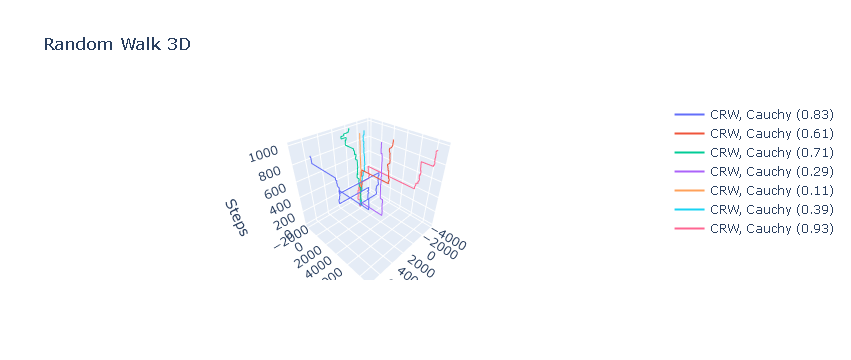

In [44]:
def visualize_trajectories(trajectories):
    fig = go.Figure()
    for i, (trajectory, cauchy_coeff) in enumerate(trajectories):
        x, y, z = zip(*[(v.x, v.y, i) for i, v in enumerate(trajectory)])
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name=f"CRW, Cauchy ({cauchy_coeff:.2f})"))
    fig.update_layout(title='Random Walk 3D', scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Steps'
    ))
    fig.show()

visualize_trajectories(trajectories)

## References:
Wikipedia contributors. (2024, August 27). Random walk. Wikipedia. https://en.wikipedia.org/wiki/Random_walk
colaboradores de Wikipedia. (2024, January 21). Camino aleatorio. Wikipedia, La Enciclopedia Libre. https://es.wikipedia.org/wiki/Camino_aleatorio